# Libraries Used

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import argparse

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Data Preprocessing

In [ ]:
data = pd.read_csv('/content/train_data.csv')

In [ ]:
data.shape

(20000, 6)

In [ ]:
data.head()

,job_id,memory_GB,network_log10_MBps,local_IO_log10_MBps,NFS_IO_log10_MBps,failed
0,jobID1634295,44.3904,-1.0262,0.8033,-3.0000,0
1,jobID2033452,31.5839,-1.4608,-0.6080,-2.9967,0
2,jobID2068800,154.4610,-0.5508,-0.3637,-3.0000,0
3,jobID78826,71.8570,3.5701,-0.1281,2.3040,0
4,jobID2935014,30.0370,3.3094,-0.9463,-3.0000,0


In [ ]:
data.isnull().sum()

job_id                 0
memory_GB              0
network_log10_MBps     0
local_IO_log10_MBps    0
NFS_IO_log10_MBps      0
failed                 0
dtype: int64

In [ ]:
y = data['failed']

In [ ]:
network = [10**i for i in data['network_log10_MBps']]
local_IO = [10**i for i in data['local_IO_log10_MBps']]
NFS_IO = [10**i for i in data['NFS_IO_log10_MBps']]

In [ ]:
data.drop(['network_log10_MBps','local_IO_log10_MBps','NFS_IO_log10_MBps'],axis=1,inplace=True)

In [ ]:
data['network'] = network
data['local_IO'] = local_IO
data['NFS_IO'] = NFS_IO

In [ ]:
data.head()

,job_id,memory_GB,failed,network,local_IO,NFS_IO
0,jobID1634295,44.3904,0,0.094146,6.357700,0.001000
1,jobID2033452,31.5839,0,0.034610,0.246604,0.001008
2,jobID2068800,154.4610,0,0.281320,0.432813,0.001000
3,jobID78826,71.8570,0,3716.207881,0.744561,201.372425
4,jobID2935014,30.0370,0,2038.919127,0.113162,0.001000


In [ ]:
data.drop(['job_id','failed'],axis=1,inplace=True)

In [ ]:
data.head()

,memory_GB,network,local_IO,NFS_IO
0,44.3904,0.094146,6.357700,0.001000
1,31.5839,0.034610,0.246604,0.001008
2,154.4610,0.281320,0.432813,0.001000
3,71.8570,3716.207881,0.744561,201.372425
4,30.0370,2038.919127,0.113162,0.001000


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,y)

In [ ]:
scaled_train = scaler.fit_transform(X_train)

In [ ]:
scaled_test = scaler.transform(X_test)

In [ ]:
unlabeled_data = pd.read_csv('/content/test_data_unlabeled.csv')

In [ ]:
unlabeled_job_id = u['job_id']

In [ ]:
unlabeled_data.head()

,job_id,memory_GB,network_log10_MBps,local_IO_log10_MBps,NFS_IO_log10_MBps
0,jobID845653,11.6819,1.9141,-0.5344,0.3944
1,jobID1649941,20.7483,-0.8377,0.3129,0.8652
2,jobID1228730,55.1166,-0.1672,-0.6554,-0.2249
3,jobID2366721,68.2202,-0.8236,1.2425,-3.0000
4,jobID1208568,20.7190,-2.0983,-0.6392,-3.0000


In [ ]:
network_unlabeled = [10**i for i in unlabeled_data['network_log10_MBps']]
local_IO_unlabeled = [10**i for i in unlabeled_data['local_IO_log10_MBps']]
NFS_IO_unlabeled = [10**i for i in unlabeled_data['NFS_IO_log10_MBps']]

In [ ]:
unlabeled_data.drop(['network_log10_MBps','local_IO_log10_MBps','NFS_IO_log10_MBps','job_id'],axis=1,inplace=True)

In [ ]:
unlabeled_data['network_unlabeled'] = network_unlabeled
unlabeled_data['local_IO_unlabeled'] = local_IO_unlabeled
unlabeled_data['NFS_IO_unlabeled'] = NFS_IO_unlabeled

In [ ]:
unlabeled_data.head()

,memory_GB,network_unlabeled,local_IO_unlabeled,NFS_IO_unlabeled
0,11.6819,82.054046,0.292146,2.479705
1,20.7483,0.145312,2.055417,7.331621
2,55.1166,0.680456,0.221106,0.595799
3,68.2202,0.150107,17.478333,0.001000
4,20.7190,0.007974,0.229509,0.001000


In [ ]:
scaled_unlabeled = scaler.transform(unlabeled_data)

# Task 1

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
path = model.cost_complexity_pruning_path(scaled_train,y_train)

In [ ]:
path

{'ccp_alphas': array([0.00000000e+00, 4.35729847e-05, 4.39335888e-05, 4.40000000e-05,
        4.44444444e-05, 4.44444444e-05, 5.00000000e-05, 5.00000000e-05,
        5.25996646e-05, 5.26789366e-05, 5.33333333e-05, 5.33333333e-05,
        5.33333333e-05, 5.33333333e-05, 5.55555556e-05, 5.55555556e-05,
        5.55555556e-05, 5.56900726e-05, 5.58635394e-05, 5.71428571e-05,
        5.71428571e-05, 5.71428571e-05, 5.71428571e-05, 5.71428571e-05,
        5.71428571e-05, 5.77777778e-05, 5.83333333e-05, 5.83333333e-05,
        5.92592593e-05, 5.92592593e-05, 5.92592593e-05, 5.92592593e-05,
        6.00000000e-05, 6.00000000e-05, 6.00000000e-05, 6.00000000e-05,
        6.00000000e-05, 6.00000000e-05, 6.03174603e-05, 6.06060606e-05,
        6.06060606e-05, 6.06060606e-05, 6.06060606e-05, 6.08695652e-05,
        6.11111111e-05, 6.11111111e-05, 6.11111111e-05, 6.11111111e-05,
        6.11111111e-05, 6.11330698e-05, 6.13675214e-05, 6.15384615e-05,
        6.15384615e-05, 6.15384615e-05, 6.15384615

In [ ]:
alphas, impurities = path.ccp_alphas, path.impurities

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


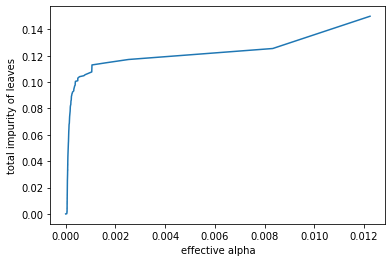

In [ ]:
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
sns.lineplot(alphas,impurities)

In [ ]:
clfs = []

for ccp_alpha in alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

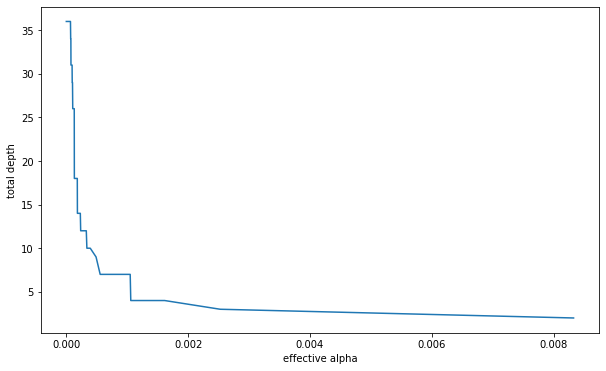

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

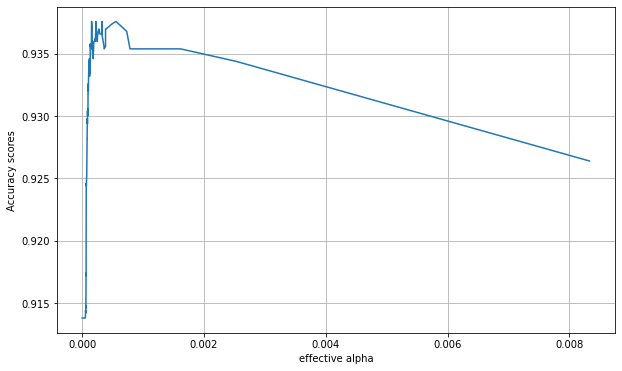

In [ ]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [ ]:
indices = []
for value in acc_scores:
    if value > 0.935:
        indices.append(acc_scores.index(value))

In [ ]:
moreindices = []
for index in indices:
    moreindices.append(alphas[index])

In [ ]:
len(indices), len(moreindices)

(81, 81)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


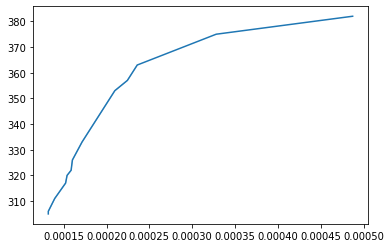

In [ ]:
sns.lineplot(moreindices,indices)

In [ ]:
final_model = DecisionTreeClassifier(random_state=0,ccp_alpha=0.00030)

In [ ]:
final_model.fit(scaled_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0003, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred = final_model.predict(scaled_test)

In [ ]:
pd.Series(pred).value_counts()

0    4833
1     167
dtype: int64

In [ ]:
preds = pd.Series(final_model.predict(scaled_unlabeled), index=unlabeled_job_id)

In [ ]:
preds.value_counts()

0    9623
1     377
dtype: int64

In [ ]:
preds.to_csv('model_complete_test.csv')

# Task 2

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
model_pca = PCA(n_components=3)

In [ ]:
scaled_train_pca = model_pca.fit_transform(scaled_train)

In [ ]:
scaled_test_pca = model_pca.transform(scaled_test)

In [ ]:
scaled_unlabeled_pca = model_pca.transform(scaled_unlabeled)

In [ ]:
scaled_train_pca.shape, scaled_test_pca.shape, scaled_unlabeled_pca.shape

((15000, 3), (5000, 3), (10000, 3))

In [ ]:
model_dtree_pca = DecisionTreeClassifier()

In [ ]:
model_dtree_pca.fit(scaled_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_dtree_pca = model_dtree_pca.predict(scaled_test_pca)

In [ ]:
pd.Series(pred_dtree_pca).value_counts()

0    4567
1     433
dtype: int64

In [ ]:
433/4603

0.09406908537910058

In [ ]:
u_pred_dtree_pca = model_dtree_pca.predict(scaled_unlabeled_pca)

In [ ]:
pd.Series(u_pred_dtree_pca).value_counts()

0    9093
1     907
dtype: int64

In [ ]:
907/9173

0.09887713943093862